## <center> About Waze </center>

##### Waze is an app that provides satellite navigation software on smartphones and other computers that support the Global Positioning System (GPS). Waze's free navigation app makes it easier for drivers around the world to get to where they want to go. Waze's community of map editors, beta testers, translators, partners, and users helps make each drive better and safer

## <center>   Project Goal  </center>

#### The final goal of this project is to develop a ML model to predict which users are most likely to stop using Waze app. This information will allow to make further decisions that will help prevent churn, improve user retention, and thus, grow Waze's business.

## <center> Churn problem </center>
#### Churn quantifies the number of users who have uninstalled the Waze app or stopped using the app. 

## <center> Main parts of this project include following steps: </center>

1. Gather and import data to Python, then inspect it in general perspective 
2. Cleaning and pre-processing data to prepare it for further analysis
3. perform EDA to understand data structure
4. Calculate descriptive statistics for quantitative variables, conduct a statistical hypothesis tests for insights
5. Build and evaluate a logistic regression model to predict outcomes  
6. Perform feature engineering and build more complex models e.g. Random forest and XGBoost

## <center>  1. Gather and import data to Python, then inspect it in general perspective   </center>

#### This will include:
- x

We import necessary libraries i.e. pandas and numpy

In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

And we load our dataset into dataFrame using standard **pandas.read_csv()** function

In [469]:
df_waze_0 = pd.read_csv("C:/Coursera/Google Advanced Data Analytics/GADA_datasets/waze_dataset.csv")

#### Except data itself, we also got provided a brief description of each column in our dataset:

- ID - A sequential numbered index
- label - Target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month 
- sessions - The number of occurrence of a user opening the app during the month
- drives - An occurrence of driving at least 1 km during the month
- device - The type of device a user starts a session with
- total_sessions - A model estimate of the total number of sessions since a user has onboarded
- n_days_after_onboarding - The number of days since a user signed up for the app
-  total_navigations_fav1 - Total navigations since onboarding to the user’s favorite place 1
- total_navigations_fav2 - Total navigations since onboarding to the user’s favorite place 2
- driven_km_drives - Total kilometers driven during the month
- duration_minutes_drives - Total duration driven in minutes during the month
- activity_days - Number of days the user opens the app during the month 
- driving_days - Number of days the user drives (at least 1 km) during the month

As a next step, we will view and inspect summary information of our dataset by using following methods and attributes from pandas module:

- head()
- info()
- shape

In [470]:
df_waze_0.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [471]:
df_waze_0.shape

(14999, 13)

In [472]:
df_waze_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


As we can see above, the variables `label` and `device` are of type `object` (`string`); `total_sessions`, `driven_km_drives`, and `duration_minutes_drives` are of type `float64`; the rest of the variables are of type `int64`. There are 14,999 rows and 13 columns.

Above, with usage of **info()** method, we also got number of non-null values per each column. Below we provide the same information from another perspective - how many times per each column, null value occurs. To do so, we will use **isnull()** and **sum()** methods from *pandas* module.

In [473]:
df_waze_0.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

We observe that the only null values in our dataframe are contained in `label` column, there are 700 of them

We will split out dataset for two parts: one where `label` is not null, and another where there are null values in `label` column. Next we will look if there are any differencies in distributions of another variables based on whether `label` columns is null or not

In [474]:
df_waze_not_null = df_waze_0[~df_waze_0["label"].isna()]
df_waze_null = df_waze_0[df_waze_0["label"].isna()]

In [475]:
print(df_waze_not_null.shape)
print(df_waze_null.shape)

(14299, 13)
(700, 13)


For quantitative variables, we will use **describe()** method to calculate summary statistics of each variable:

In [476]:
df_waze_not_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [477]:
df_waze_null.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


Comparison of observation where `label` value is missing with those that are not missing didn't reveal anything noteworthy. By this, we mean that means and standard deviations are very consistent across both groups.

For qualitative variable `device` - we will calculate distributions for both group by using **value_counts()** method from *pandas*.

In [478]:
print(df_waze_not_null['device'].value_counts())
print(df_waze_not_null['device'].value_counts(normalize = True))

device
iPhone     9225
Android    5074
Name: count, dtype: int64
device
iPhone     0.64515
Android    0.35485
Name: proportion, dtype: float64


In [479]:
print(df_waze_null['device'].value_counts())
print(df_waze_null['device'].value_counts(normalize = True))

device
iPhone     447
Android    253
Name: count, dtype: int64
device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64


Also there, we see that there is nothing unusual in those distributions. Both are very similar.

There is nothing to suggest a non-random cause of the missing data in our dataset.

In next step, we want to check for distribution in our target variable - `label`. We will use a **value_counts()** method again, once for numbers, and once for percentages, with parameter *normalize = True*.

In [480]:
print(df_waze_0["label"].value_counts())
print(df_waze_0["label"].value_counts(normalize = True))

label
retained    11763
churned      2536
Name: count, dtype: int64
label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


Our dataset contains over 80% of retained users.

Next, we will look for median values of numerical variables for retained and churned users of Waze app. We use median instead of mean because it is resistant for outliers. We will use **groupby()** and **median()** methods from *pandas* module. 

In [481]:
df_waze_0.groupby("label").median(numeric_only = True)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,,
churned,7477.5,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,7509.0,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


This comparison offers an interesting snapshot of the two groups, churned vs. retained:

Users who churned averaged about 3 more drives per month, but they got an over 2 times lower activity on app, counted in days. They also have more than 2 times less driving days throughout whole month than retained users. However, despite this fact, churned users drived more kms. It seems that users who left the app were doing longer drives in shorter period of time. To confirm this, we will create another column `km_driven_per_drive` which will help us calculate median kilometers per drive in the last month for both retained and churned users.

In [482]:
df_waze_0["km_driven_per_drive"] = df_waze_0["driven_km_drives"] / df_waze_0["drives"]

As we divide by `drives` column, we want to check whether this column contains some zeros, and therefore whether our new created column contains some infinity values (np.inf).

In [483]:
df_waze_0[ df_waze_0["km_driven_per_drive"] == np.inf ]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_driven_per_drive
25,25,retained,0,0,139.194969,2731,13,4,5702.339466,4582.737478,6,2,Android,inf
97,97,retained,0,0,559.547112,2879,0,0,6668.844350,3511.370419,28,24,Android,inf
217,217,retained,0,0,33.710210,629,160,0,6103.881670,1767.846528,8,2,iPhone,inf
339,339,retained,0,0,0.220211,347,130,0,2520.850896,1539.318152,20,15,iPhone,inf
485,485,NaN,0,0,90.747466,579,229,0,1363.206140,66.588493,15,11,iPhone,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14411,14411,retained,0,0,472.078785,1746,126,0,3148.136679,1685.365455,20,18,Android,inf
14549,14549,retained,0,0,96.781778,2732,425,16,1394.604767,573.591169,18,10,iPhone,inf
14562,14562,retained,0,0,20.067490,1355,83,98,1805.177261,271.398262,23,17,iPhone,inf
14668,14668,retained,0,0,5.626862,592,0,0,7959.247975,869.674910,13,9,Android,inf


As we see above, there are 106 np.inf values for our new column. We dont want them, so we assign those obsevations manually with zero value.

In [484]:
df_waze_0["km_driven_per_drive"] = df_waze_0["km_driven_per_drive"].replace(np.inf, 0).fillna(0)

In [485]:
df_waze_0[ df_waze_0["km_driven_per_drive"] == np.inf ]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_driven_per_drive


As we checked above, our operation was succeed. We can now calculate median values.

In [486]:
df_waze_0[["km_driven_per_drive", "label"]].groupby("label").median()

,km_driven_per_drive
label,
churned,72.771939
retained,73.006576


The users who are more loyal to our app have averaged almost one more km per drive than churned users.

We will also try the same thing, just investigating number of kms per driving days instead of particular drives.

In [487]:
df_waze_0["km_driven_per_driving_day"] = df_waze_0["driven_km_drives"] / df_waze_0["driving_days"]

In [488]:
df_waze_0["km_driven_per_driving_day"] = df_waze_0["km_driven_per_driving_day"].replace(np.inf, 0).fillna(0)

In [489]:
df_waze_0[["km_driven_per_driving_day", "label"]].groupby("label").median()

,km_driven_per_driving_day
label,
churned,407.597934
retained,256.056187


We also check the ratio of amount of drives for each driving day for our studied groups:

In [490]:
df_waze_0["drives_per_driving_day"] = df_waze_0["drives"] / df_waze_0["driving_days"]
df_waze_0["drives_per_driving_day"] = df_waze_0["drives_per_driving_day"].replace(np.inf, 0).fillna(0)
df_waze_0[["drives_per_driving_day", "label"]].groupby("label").median()

,drives_per_driving_day
label,
churned,5.483333
retained,3.470588


The median user who churned drove 698 kilometers each day. They drove last month almost 2.5 times(!) more than retained users per driving day. What's more, we see that those users also have more drives per each day, with very similar proportion (240%-250% more) comparing to retained users group. 
<br>
It is more than clear that all users, no matter whether they churned or not, are driving a lot. With almost 300kms and 700kms per each group, it is safe to assume that those numbers does not represent casual drivers. It is really likely that our dataset represents some kind of proffesional drivers. It would be good idea to recommend gather more data on those super drivers. Maybe the reason why they drive so much is also the reason why they leave our app more often, because it does not meet their specific needs which could differ from more casual drivers. 

Also, we want to check whether there is any relationship between churn and our only qualitative explanatory variable.

In [491]:
df_waze_0.groupby("label")["device"].value_counts()

label     device 
churned   iPhone     1645
          Android     891
retained  iPhone     7580
          Android    4183
Name: count, dtype: int64

In [492]:
df_waze_0.groupby("label")["device"].value_counts(normalize = True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

The ratio between iPhone and Android users is very consistent between churned group and those who retained with our app.

## <center>  2. Cleaning and pre-processing data to prepare it for further analysis   </center>


Given our scenario, we will choose which columns are most applicable. Since we are interested in user churn, the `label` column is necessary. Beside that, we will recognize all columns related to any kind of user behavior as applicable to our task. The only column that does not provide useful information is `ID` as we do not want to identificate particular users. Therefore, we will drop this column.

In [493]:
df_waze_0 = df_waze_0.drop("ID", axis = 1)

In [494]:
df_waze_0.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,304.530374,13.333333
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,219.455667,3.777778


Next step will include handling with outliers. To identify them, we will use mean and median values as well as boxplots which will provide us visual representation of potential outliers. 

In [495]:
df_waze_0.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,232.817946,578.963113,9.382987
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,620.622351,1030.094384,19.822506
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,32.424301,136.238895,1.238095
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,72.854343,272.889272,3.666667
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,179.347527,558.686918,9.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15777.426560,15420.234110,395.000000


In seaborn library, there is an option to turn on another theme by **sns.set()** instruction. It is different from default matplotlib.pyplot theme, if we wanted to return to this default option, we should execute **sns.reset_orig()** command.

In [496]:
sns.set()
#sns.reset_orig()

In [497]:
# example plot

# fig, ax = plt.subplots(figsize = (6,1.5))
# sns.boxplot(x = df_waze_0["sessions"], ax = ax)
# plt.show()

In [498]:
# function for plotting boxplot in plt

# def boxplot_plt(col_arg, figsize_arg = None):
#    # fig, ax = plt.subplots(figsize = (6,1.5))

#     if figsize_arg == None:
#         fig, ax = plt.subplots()
#     else:
#         fig, ax = plt.subplots(figsize = figsize_arg)
#     ax = plt.boxplot( col_arg, orientation = 'horizontal', widths = 0.5)
#     plt.show()

# boxplot_plt( col_arg = df_waze_0["sessions"], figsize_arg = (6,2))

## Analysis of boxplots

Below, we define our custom function to plot a boxplot for certain numerical variable given by user. User can also modify size of plotted figure by entering a two-value tuple as a second argument.

In [499]:
import pandas.api.types as ptypes

In [500]:
def boxplot_sns(df_name_arg, col_arg, figsize_arg = None, **kwargs):   # **kwargs = any keyword arguments for sns.boxtplot() function

    if not isinstance(df_name_arg, pd.DataFrame):
        print("Please enter dataframe as first argument!")
        return

    if col_arg not in df_name_arg.columns:
        print("Please enter valid column name!")
        return
    
    if not ptypes.is_numeric_dtype(df_name_arg[col_arg]) :
        print("Please enter numeric column as second argument!")
        return   # end function

    if not (isinstance(figsize_arg, tuple) or isinstance(figsize_arg, list)):
        print("Please enter tuple or list as third argument!")
        return

    if not len(figsize_arg) == 2:
        print("Your given tuple or list for size of figure  should contain 2 numeric values!")
        return
    
    if figsize_arg is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.subplots( figsize = figsize_arg )
    
    sns.boxplot(x = df_name_arg[col_arg], ax = ax, **kwargs)    
    plt.show()
    # fig, ax = plt.subplots
    # sns.boxplot(x = df_waze_0["sessions"], ax = ax)
    # plt.show()

We get a list of all numerical variables included in our dataset:

In [501]:
df_waze_0["sessions"].count() // 300

np.int64(49)

In [502]:
num_cols = df_waze_0.select_dtypes(include=['number']).columns.tolist()

Now we execute our **boxplot_sns()** function to each of numerical column contained in a list above:

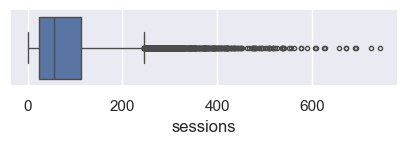

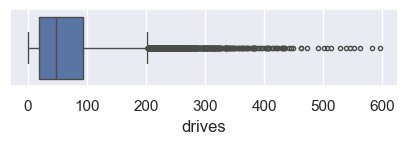

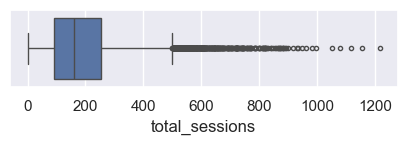

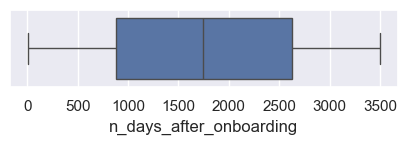

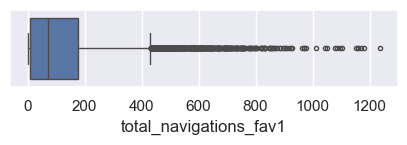

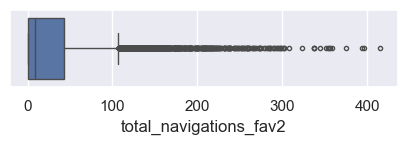

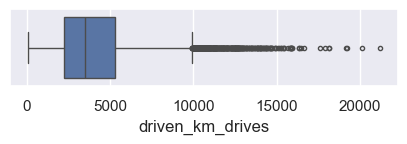

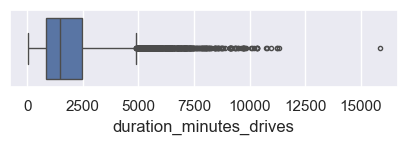

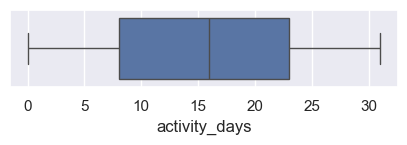

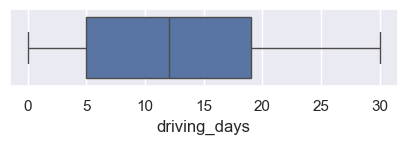

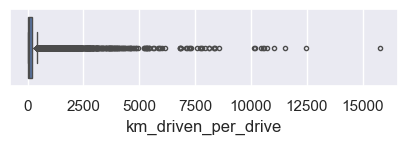

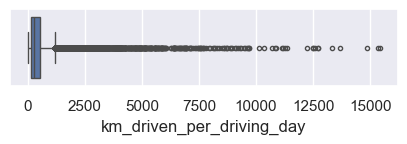

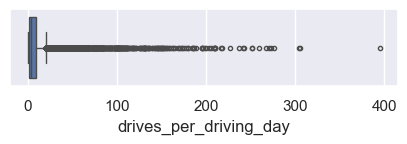

In [503]:
for col in num_cols:
    boxplot_sns( df_waze_0, col, (5, 1), fliersize = 3)

Let's remind, in boxplot chart outliers are being shown as points reaching over "Minimum" and "Maximum". Values of those "Minimum" and "Maximum" are Q1-1.5\*IQR and Q3+1.5\*IQR respectively. Obviously, there could be situation, where no single value could be classified as an outlier, if that is the case, no points behind whiskers are visualized.
<br>
However, in most of our numeric columns, there are values that we can identify as outliers. Only `n_days_after_onboarding`,`activity_days` and `driving_days`don't have any outliers. In all other numeric columns we have some outliers, in all of them they are bigger than our "Maximum", which tells us that distributions of those variables are right-skewed. We will look for confirmation of this fact by creating histplots of our numeric columns.

## Analysis of histplots

In [504]:
def histplot_sns(df_name_arg, col_arg, figsize_arg = None, bins_arg = None, median_text_arg = True, **kwargs):    # **kwargs = any keyword arguments for sns.histplot() function

# -------------  validation of values enter by user ----------------
    if not isinstance(df_name_arg, pd.DataFrame):
        print("Please enter dataframe as first argument!")
        return

    if col_arg not in df_name_arg.columns:
        print("Please enter valid column name!")
        return

    if not ptypes.is_numeric_dtype(df_name_arg[col_arg]) :
        print("Please enter numeric column as second argument!")
        return   # end function

    if not (isinstance(figsize_arg, tuple) or isinstance(figsize_arg, list)):
        print("Please enter tuple or list as third argument!")
        return

    if not len(figsize_arg) == 2:
        print("Your given tuple or list for size of figure should contain 2 numeric values!")
        return


#-----------------------------------------------------------
    
    if figsize_arg is None:
        fig, ax = plt.subplots()
    else:
        fig, ax = plt.subplots( figsize = figsize_arg )

    median_value = df_name_arg[col_arg].median().round(decimals = 2)
    if bins_arg != "auto":
         bins_arg = df_name_arg[col_arg].count() // 300
   # print(bins_arg)
    sns.histplot(x = df_name_arg[col_arg], ax = ax, bins = bins_arg, **kwargs)  
    
    ax.axvline(x=median_value, color='r', linestyle='--', linewidth=1.5)

    if median_text_arg:
        ax.text(0.25, 0.85, f'median={median_value}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median for {} column:'.format(col_arg), median_value)
    
    ax.set_title("{} - histogram".format(col_arg))
    plt.show()


### `sessions`

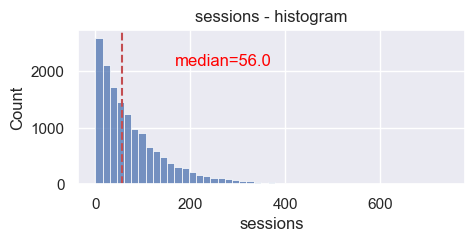

In [505]:
histplot_sns(df_waze_0, "sessions", (5,2))

The distibutions of a `sessions` variable is strictly right-skewed. Most of users open app few times, with half of the users open app 56 or less times. But, as indicated previously in boxplot, there are users who have opened Waze app even +700 times during this month.

### `drives`

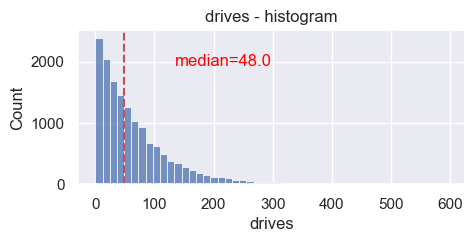

In [506]:
histplot_sns(df_waze_0, "drives", (5,2))

We see that distribution of `drives` is also strictly right-skewed with most of users having few drives during month, but on the other hand there are users who drove a few houndred times, some of them got almost 600 drives during this month.

### `total_sessions`

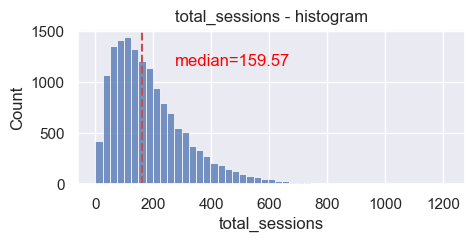

In [507]:
histplot_sns(df_waze_0, "total_sessions", (5,2))

Distribution of `total_sessions` is also right-skewed, but most of users have total number of sessions between 50 and 130. However, half of observations have values bigger than 160 with few values even bigger than 1000.

### `n_days_after_onboarding`

Median for n_days_after_onboarding column: 1741.0


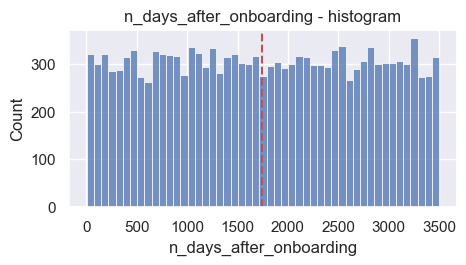

In [508]:
histplot_sns(df_waze_0, "n_days_after_onboarding", (5, 2.3), median_text_arg = False)

As we can see above, `n_days_after_onboarding` values are uniformly distributed between 0 and 3500, with median value equal to approximately 1700.

### `driven_km_drives`

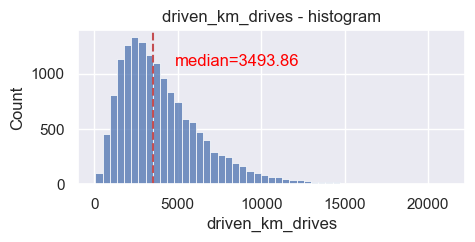

In [509]:
histplot_sns(df_waze_0, "driven_km_drives", (5,2))

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As we discovered in the analysis before, the users in this dataset drive a lot.  The longest distance driven in the month was over half the circumferene of the earth. (20 000+ kms)

### `duration_minutes_drives`

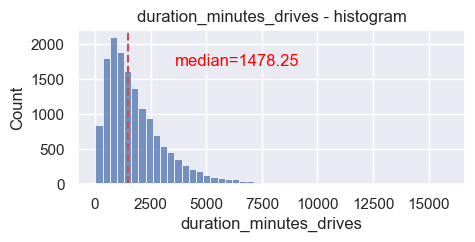

In [510]:
histplot_sns(df_waze_0, "duration_minutes_drives", (5,2))

Duration of drives per user is also right-skewed with 50% of population driving less than 1480 minutes which is a little more than 1 day. However, there are users that drove even more than 15000 minutes (more than 10 days) during last month, which also indicates that they are really serious drivers. 

### `activity_days`

Median for activity_days column: 16.0


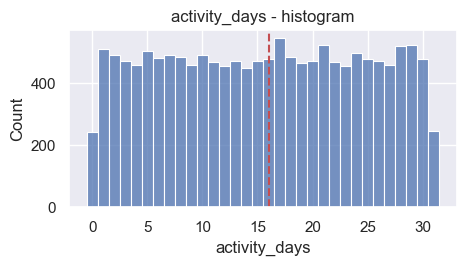

In [511]:
histplot_sns(df_waze_0, "activity_days", (5, 2.3), median_text_arg = False, discrete = True)

Number of activity days per user is uniformly distributed with ~500 count for all values between 1 and 30, but we observe significantly lower values for users with least activity with 0 days and most with 31 days, there are only ~250 of them. It is also worth to note that distribution of `activity_days` is not highly corelated with `sessions` which could be a guess. In particular, `sessions` variable had strictly right-skewed distribution.

### `driving_days`

Median for driving_days column: 12.0


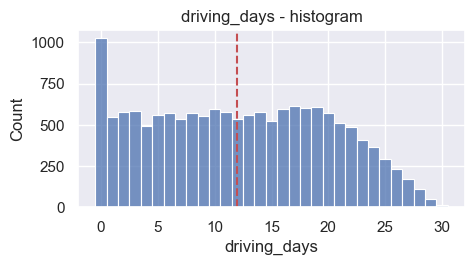

In [512]:
histplot_sns(df_waze_0, "driving_days", (5, 2.3), median_text_arg = False, discrete = True)

When it comes to driving days, the biggest number of users have not drived at all this month - there are around 1000 them. Whatsmore, thre are ~500 users that are driving for each number of days between 1 and 20. Less users were driving for more than 20 days - distribution between 20 and 30 becomes right-skewed with fewest users that drived in each day of this month.

`device` column

In [513]:
def plt_piechart(df_name_arg, col_arg, figsize_arg = None):


    if not isinstance(df_name_arg, pd.DataFrame):
        print("Enter dataframe as first argument!")
        return 

    if not col_arg in df_name_arg.columns:
        print("Enter a column name as second argument!")
        return

    if not ptypes.is_object_dtype(df_name_arg[col_arg]) :
        print("Please enter text column (object type) as second argument!")
        return

    if not (isinstance (figsize_arg, tuple) or isinstance(figsize_arg, list)):
        print("Please enter a tuple or list as third argument!")
        return

    if not len(figsize_arg) == 2:
        print("Please enter a tuple or list containing 2 values!")
        return
     
    fig, ax = plt.subplots(figsize= figsize_arg)
    
    counts = df_name_arg[col_arg].value_counts()

    
    ax.pie(counts,
        labels=["{}: {}".format(index, val) for index, val in counts.items()],
        autopct='%1.1f%%'
        )
    ax.set_title("Users by {}".format(col_arg))
    plt.show()

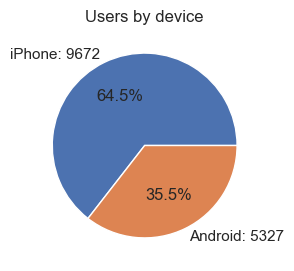

In [514]:
plt_piechart(df_waze_0, "device", (3,3))

`label` column

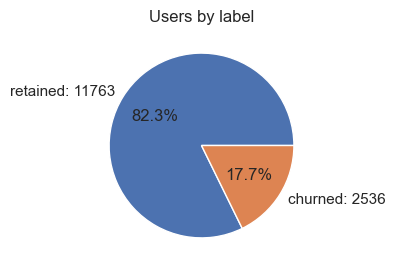

In [515]:
plt_piechart(df_waze_0, "label", (3,3))

#### Retention by device

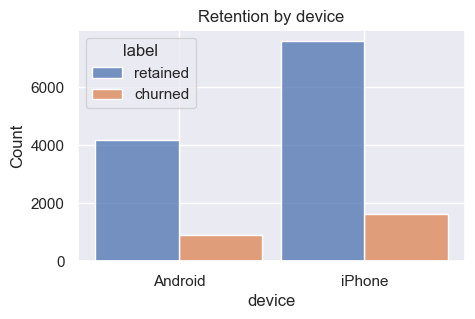

In [516]:
# Histogram
fig, ax = plt.subplots(figsize=(5,3))
sns.histplot(data=df_waze_0,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9, 
             ax = ax
             )
ax.set_title('Retention by device')
plt.show();

By plotting counts of retained and churned users per every device type, we see that for both devices, ratio of churned users is very similar

#### Retention by kilometers driven per driving day

In [517]:
df_waze_0.columns

Index(['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'km_driven_per_drive',
       'km_driven_per_driving_day', 'drives_per_driving_day'],
      dtype='object')

In [518]:
df_waze_0['km_driven_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_driven_per_driving_day, dtype: float64

We see that even though we already cut some outliers, maximum value of column `km_driven_per_driving_day` is still pretty high with 2237 kms. Let's assume that driver is riding with average speed 100km/h for 14 hours. That would be 1400km per day, and it is hard to imagine that someone could drive much longer distance throughout one day. So while plotting the following plot, we will focus only on values of `km_driven_per_driving_day` less or equal to 1400.

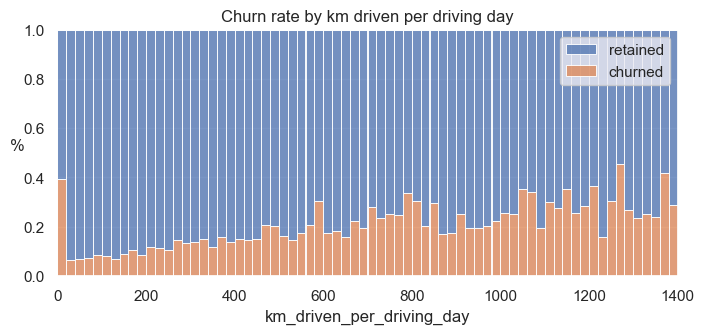

In [519]:
fig, ax = plt.subplots(figsize=(8,3.2))
sns.histplot(data=df_waze_0,
             x='km_driven_per_driving_day',
             bins=range(0,1401,20),
             hue='label',
             multiple='fill', 
             legend = False,   # ignoring default legend
             ax = ax)
ax.set_ylabel('%', rotation=0)
ax.set_title('Churn rate by km driven per driving day')
ax.legend(["churned", "retained"], reverse = True, loc='upper right')  # adding legend by plt, to set a location to upper right
plt.show();

As we can see above, there are some patterns to describe from foregoing plot. First, we see that in group of users that did not drive at all, there was much higher risk to churn than in cases where users were driving relatively small distances during month. We see that except "group 0", there is clear trend that with longer distances per day, users were more likely to churn. With that in mind, we could assume that there could be some issue with our app while driving very long distances, finally reasoning in users to leave our Waze app.

#### Retention by number of driving days

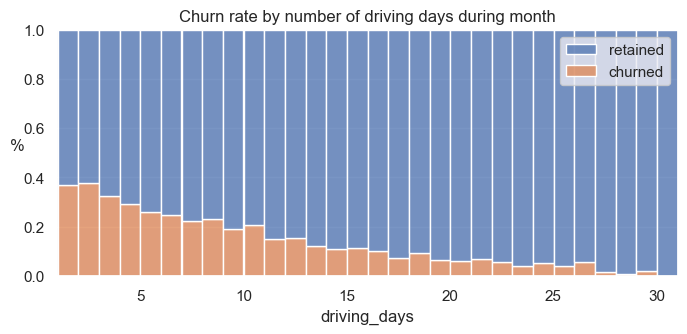

In [520]:
fig, ax = plt.subplots(figsize=(8,3.2))
sns.histplot(data=df_waze_0,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill', 
             legend = False,   # ignoring default legend
             ax = ax)
ax.set_ylabel('%', rotation=0)
ax.set_title('Churn rate by number of driving days during month')
ax.legend(["churned", "retained"], reverse = True, loc='upper right')  # adding legend by plt, to set a location to upper right
plt.show();

We see from above chart, that the less days particular user is driving, the bigger probability that he will churn. It is rather logical, because if someone is driving less and less, then he would not have reason to use our app.

#### Proportion of sessions during last month

We discovered earlier that there is surprisingly high ratio of sessions during last month to total sessions. To further inspect that, we will create and analyze new column with this ratio

In [521]:
df_waze_0["percentage_of_sessions_last_month"] = ((df_waze_0["sessions"] / df_waze_0["total_sessions"].
                                                   round(decimals=0)).
                                                   round(decimals = 2).
                                                   fillna(0))

In [522]:
df_waze_0["percentage_of_sessions_last_month"].describe()

count    14999.000000
mean         0.449228
std          0.286833
min          0.000000
25%          0.200000
50%          0.420000
75%          0.690000
max          1.000000
Name: percentage_of_sessions_last_month, dtype: float64

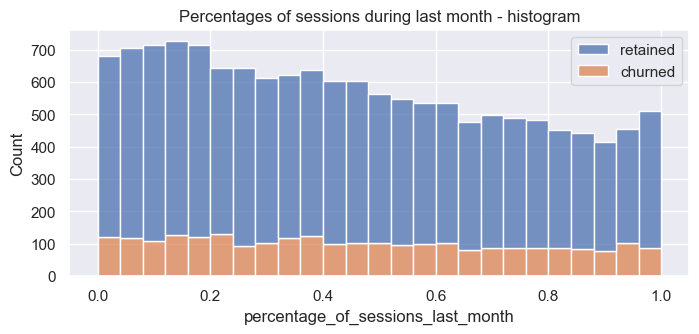

In [523]:
fig, ax = plt.subplots(figsize=(8,3.2))
sns.histplot(data=df_waze_0,
             x="percentage_of_sessions_last_month",
             #bins=range(0,1, 20),
             hue='label',
             multiple='stack', 
             legend = False,   # ignoring default legend
             ax = ax)
ax.set_ylabel('Count', rotation=90)
ax.set_title('Percentages of sessions during last month - histogram')
ax.legend(["churned", "retained"], reverse = True, loc='upper right')  # adding legend by plt, to set a location to upper right
plt.show();

The plot above confirms our guesses that very high percentage of total sessions were made in last month. With many users that got more than 90% - that is reall difficult to explain. We will dig deeper by analyze users with at least half of sessions made during this month. We will check for how long this users are with our app by exploring distribution of `n_days_after_oboarding` columns.

In [524]:
df_waze_test = df_waze_0[df_waze_0["percentage_of_sessions_last_month"] >= 0.5]

Median for n_days_after_onboarding column: 1750.0


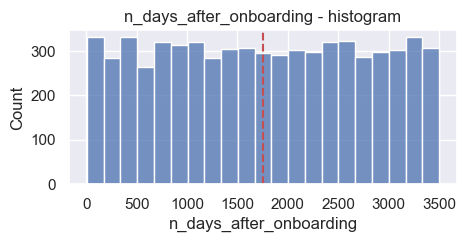

In [525]:
histplot_sns(df_waze_test, "n_days_after_onboarding", (5,2), median_text_arg = False)

Actually, we observe something that is very strange. There are users that used our app years ago (maximum, almost 10 years!), and they all have unusual bigger activity on app during this month. It is worth to ask Waze why. 

## Analysis of quantiles

For `n_days_after_onboarding`, `activity_days` and `driving_days` columns, for which we did not identify outlierss in boxplot and histplots, we see relatively small differences between 95% quantile and maximum value. All other considered numeric variables have big, meaningful difference between maximum and 95% quantile. We decide to cut all values bigger than 95% quantile and assign this threshold value for them. We will repeat this procedure for each of those columns.

In [526]:
num_cols_to_cut = (
    df_waze_0
    .select_dtypes(include=['number'])
    .drop(["n_days_after_onboarding", "activity_days", "driving_days"], axis=1)
    .columns
)

For further analysis of outliers, we will add some quantile values to our analysis. To do so, we will use **quantile()** method, quantiles of 0.75, 0.9, 0.95 and 1 (Maximum) will be calculated.

In [527]:
df_waze_0.quantile([0.75, 0.9, 0.95, 1], numeric_only = True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day,percentage_of_sessions_last_month
0.75,112.0,93.0,254.192341,2623.5,178.0,43.0,5289.861262,2464.362632,23.0,19.0,179.347527,558.686918,9.0,0.69
0.90,185.0,153.0,370.157341,3149.2,319.0,88.0,7411.759562,3737.615212,28.0,23.0,492.750391,1295.664093,21.0,0.87
0.95,243.0,201.0,454.363204,3314.0,424.0,124.0,8889.794236,4668.899349,29.0,25.0,908.458891,2237.150623,37.0,0.94
1.00,743.0,596.0,1216.154633,3500.0,1236.0,415.0,21183.401890,15851.727160,31.0,30.0,15777.426560,15420.234110,395.0,1.00


In [528]:
df_waze_0["sessions"].median()

np.float64(56.0)

In [529]:
def outlier_handler(df_arg, col_arg, percentile_arg):
    # Calculate threshold
    threshold = df_arg[col_arg].quantile(percentile_arg)
    # Impute threshold for values > than threshold
    df_arg.loc[df_arg[col_arg] > threshold, col_arg] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(col_arg, percentile_arg, threshold))

In [530]:
for c in num_cols_to_cut:
    outlier_handler(df_waze_0, c, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 201.0
           total_sessions | percentile: 0.95 | threshold: 454.3632037399997
   total_navigations_fav1 | percentile: 0.95 | threshold: 424.0
   total_navigations_fav2 | percentile: 0.95 | threshold: 124.0
         driven_km_drives | percentile: 0.95 | threshold: 8889.7942356
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.899348999998
      km_driven_per_drive | percentile: 0.95 | threshold: 908.4588914
km_driven_per_driving_day | percentile: 0.95 | threshold: 2237.1506231
   drives_per_driving_day | percentile: 0.95 | threshold: 37.0
percentage_of_sessions_last_month | percentile: 0.95 | threshold: 0.94


Check if our operation was success by comparing 95% quantile and maximum values of selected columns, they should be equal.

In [531]:
df_waze_0.quantile([0.95, 1], numeric_only = True)[num_cols_to_cut]

,sessions,drives,total_sessions,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day,percentage_of_sessions_last_month
0.95,243.0,201.0,454.343512,424.0,124.0,8889.777661,4668.821721,908.455073,2237.138455,37.0,0.94
1.00,243.0,201.0,454.363204,424.0,124.0,8889.794236,4668.899349,908.458891,2237.150623,37.0,0.94


## <center> 3. Data exploration and hypothesis testing </center>

In [532]:
from scipy import stats

Our task there will be to examine relationship between `device`    . However, `device` column is string, categorical variable. In order to conduct analysis, we need to change its type to integer.

In [533]:
df_waze_0["device"].unique()

array(['Android', 'iPhone'], dtype=object)

In [534]:
map_dict = {"iPhone": 1, "Android": 2}

In [535]:
df_waze_0["device_int"] = df_waze_0["device"].map(map_dict)

Now lets create a comparison of means of numeric columns in users grouped by device type.

In [536]:
df_waze_0.groupby("device_int").mean(numeric_only = True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day,percentage_of_sessions_last_month
device_int,,,,,,,,,,,,,,
1,77.090778,64.446340,184.912527,1740.824028,114.603081,27.155500,3938.767021,1782.653120,15.474979,12.159222,168.670556,482.262120,7.446196,0.448309
2,75.620800,63.353482,182.431351,1766.203679,114.074151,27.321006,3941.204654,1802.346681,15.649897,12.217383,165.781271,481.630152,7.294208,0.446974


We choose 3 numeric columns from above that we are interested in checking whether they are associated in significant way with `device` column. Those are `drives`, `km_driven_per_drive` and `drives_per_driving_day`.

In [537]:
df_waze_0.groupby("device_int")[["drives", "km_driven_per_drive", "drives_per_driving_day"]].mean()

,drives,km_driven_per_drive,drives_per_driving_day
device_int,,,
1,64.446340,168.670556,7.446196
2,63.353482,165.781271,7.294208


Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a higher number of drives, higher distance per one drive and bigger number of drives per driving day on average. However, this differences might arise from random sampling, rather than being a true differences in the number of drives. To assess whether the differences are statistically significant, we can conduct a hypothesis tests.

In the first place, we will focus on `drives` column

Our goal is to conduct a two-sample t-test. Lets recall the steps for conducting a hypothesis test:

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Note:** This is a t-test for two independent samples. This is the appropriate test since the two groups are independent (Android users vs. iPhone users).


**Hypotheses:**

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

Next, lets choose standard value 5% as the significance level and proceed with a two-sample t-test.

We can use the `stats.ttest_ind()` function to perform the test.

**Technical note**: The default for the argument `equal_var` in `stats.ttest_ind()` is `True`, which assumes population variances are equal. This equal variance assumption might not hold in practice (that is, there is no strong reason to assume that the two groups have the same variance); you can relax this assumption by setting `equal_var` to `False`, and `stats.ttest_ind()` will perform the unequal variances $t$-test (known as Welch's `t`-test). Refer to the [scipy t-test documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.


1. Isolate the `drives` column for iPhone users.
2. Isolate the `drives` column for Android users.
3. Perform the t-test

In [538]:
# 1. Isolate the `drives` column for iPhone users.
iPhone_drives = df_waze_0[df_waze_0['device_int'] == 1]['drives']

# 2. Isolate the `drives` column for Android users.
Android_drives = df_waze_0[df_waze_0['device_int'] == 2]['drives']

# 3. Perform the t-test
stats.ttest_ind(a=iPhone_drives, b=Android_drives, equal_var=False)

TtestResult(statistic=np.float64(1.1643714136026293), pvalue=np.float64(0.24429844267242218), df=np.float64(11148.669519764011))

In [539]:
statistic, pvalue = stats.ttest_ind(a=iPhone_drives, b=Android_drives, equal_var=False)

Now lets define a function for code to be more reproducible.

In [540]:
def two_samples_ttest_ind(df_name_arg, col_cat_arg, col_num_arg, **kwargs):

    if not isinstance(df_name_arg, pd.DataFrame):
        print("Enter dataframe as first argument!")
        return 

    if not (col_cat_arg in df_name_arg.columns or col_cat_arg in df_name_arg.columns):
        print("Enter a column name as second and thirdargument!")
        return

    if not ptypes.is_numeric_dtype(df_name_arg[col_cat_arg]) :
        print("Please enter numeric as second argument!")
        return

    if not df_name_arg[col_cat_arg].nunique() == 2:
        print("Please enter a column categorical that contains only 2 unique values!")
        return
    
    if not ptypes.is_numeric_dtype(df_name_arg[col_num_arg]) :
        print("Please enter numeric column as third argument!")
        return

    values = df_name_arg[col_cat_arg].unique()
    
    a_sample = df_name_arg[df_name_arg[col_cat_arg] == values[0]][col_num_arg]
    b_sample = df_name_arg[df_name_arg[col_cat_arg] == values[1]][col_num_arg]

    statistic, pvalue = stats.ttest_ind(a = a_sample, b = b_sample, equal_var=False)

    print("Statistic value = {}, pvalue = {}".format(round(statistic, 2), round(pvalue, 2)))
        

(1)

In [541]:
two_samples_ttest_ind(df_waze_0, "device_int", "drives")

Statistic value = -1.16, pvalue = 0.24


(2)

In [542]:
two_samples_ttest_ind(df_waze_0, "device_int", "km_driven_per_drive")

Statistic value = -0.74, pvalue = 0.46


(3)

In [543]:
two_samples_ttest_ind(df_waze_0, "device_int", "drives_per_driving_day")

Statistic value = -0.93, pvalue = 0.35


In all three cases above we see that pvalues are bigger than significance level = 0.05, as a result *we fail to reject null hypothesis*, therefore we conclude that there is **not** a statistically significant difference in the average number of drives (1), in the average distance driven per drive (2), and in the number of driver per each driving day (3) between drivers who use iPhones and drivers who use Androids.

## <center>  4. Regression modeling   </center>

#### Handling missing values

In [544]:
df_waze_0.isna().sum()

label                                700
sessions                               0
drives                                 0
total_sessions                         0
n_days_after_onboarding                0
total_navigations_fav1                 0
total_navigations_fav2                 0
driven_km_drives                       0
duration_minutes_drives                0
activity_days                          0
driving_days                           0
device                                 0
km_driven_per_drive                    0
km_driven_per_driving_day              0
drives_per_driving_day                 0
percentage_of_sessions_last_month      0
device_int                             0
dtype: int64

Earlier we discovered that there are 700 missing values in `label` column. It is key, target column, therefore we need to handle those missing values. After further analysis, we concluded that there were not any clear patterns to observations where `label` value was missing, so we decide to just delete rows where `label` is missing from further analysis and modeling.

In [545]:
df_waze_1 = df_waze_0[~df_waze_0["label"].isna()]

In [546]:
df_waze_1.shape

(14299, 17)

In [547]:
df_waze_1.isna().sum()

label                                0
sessions                             0
drives                               0
total_sessions                       0
n_days_after_onboarding              0
total_navigations_fav1               0
total_navigations_fav2               0
driven_km_drives                     0
duration_minutes_drives              0
activity_days                        0
driving_days                         0
device                               0
km_driven_per_drive                  0
km_driven_per_driving_day            0
drives_per_driving_day               0
percentage_of_sessions_last_month    0
device_int                           0
dtype: int64

We checked to ensure that our cut dataframe contains correct number of observations.

Now lets import necessary packages for building a logistic regression model.

In [548]:
# Packages for Logistic Regression & Confusion Matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

We have already identified and handled outliers (cut to 0.95 percentiles) and handled missing values. Also, we have already created some new columns that could be useful:
- `km_driven_per_drive`
- `km_driven_per_driving_day`
- `drives_per_driving_day`
- `percentage_of_sessions_last_month`

In [549]:
df_waze_1.head(3)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day,percentage_of_sessions_last_month,device_int
0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,138.360267,11.894737,0.94,2
1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,128.186173,1246.901868,9.727273,0.41,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,382.393602,11.875000,0.84,2


Lets create a column `professional driver` indicating whether the driver passes our conditions of driving a lot so he is included in our group. The next step will be to determine some conditions that would be helpful.

Lets start with 13 driving days and 50 drives. We will check if certain user had `driving_days` >= 13 and `drives` >= 50.

In [550]:
df_waze_1["professional_driver"] = np.where((df_waze_1.loc[:,"driving_days"] >= 13) & (df_waze_1.loc[:,"drives"] >= 50),  1 , 0)

C:\Users\Xer12\AppData\Local\Temp\ipykernel_28636\2840601963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waze_1["professional_driver"] = np.where((df_waze_1.loc[:,"driving_days"] >= 13) & (df_waze_1.loc[:,"drives"] >= 50),  1 , 0)


In [551]:
df_waze_1["professional_driver"] = np.where((df_waze_1["driving_days"] >= 13) & (df_waze_1["drives"] >= 50),  1 , 0)

C:\Users\Xer12\AppData\Local\Temp\ipykernel_28636\979863414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waze_1["professional_driver"] = np.where((df_waze_1["driving_days"] >= 13) & (df_waze_1["drives"] >= 50),  1 , 0)


In [552]:
df_waze_1["professional_driver"].mean().round(decimals = 4)

np.float64(0.2369)

In [553]:
(df_waze_1["driving_days"] >= 13).mean().round(decimals = 4)

np.float64(0.4851)

In [554]:
(df_waze_1["drives"] >= 50).mean().round(decimals=4)

np.float64(0.4875)

We see that with our implemented conditions, we got over 23,5% users classified as professional drivers. We checked that it is not the case that one of conditions filter a lot more than another, they just combine well together. As we are ok with those results, we dedcide to make this column like this without further modifications.

In [555]:
# 1. Check count of professionals and non-professionals
df_waze_1['professional_driver'].value_counts()

professional_driver
0    10911
1     3388
Name: count, dtype: int64

In [556]:
# 2. Check in-class churn rate
df_waze_1.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver  label   
0                    retained    0.791770
                     churned     0.208230
1                    retained    0.922078
                     churned     0.077922
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.8%, while the churn rate for non-professionals is 20.8%. This seems like it could add predictive signal to the model.

Before, we have already transformed `device` column to integer values. Now we will do the same thing with our target variable `label`

In [557]:
dict_map = {"retained": 1, "churned": 2}

In [558]:
df_waze_1["label_int"] = df_waze_1["label"].map(dict_map)

C:\Users\Xer12\AppData\Local\Temp\ipykernel_28636\2570158940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_waze_1["label_int"] = df_waze_1["label"].map(dict_map)


Lets create a dataset `df_waze_2` including only numeric columns.

In [559]:
df_waze_2 = df_waze_1.select_dtypes(include = 'number')

### **Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, we can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [560]:
# Generate a correlation matrix
df_waze_2.corr(method='pearson').round(decimals = 3)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day,percentage_of_sessions_last_month,device_int,professional_driver,label_int
sessions,1.000,0.997,0.597,0.007,0.002,0.009,0.003,-0.005,0.025,0.020,-0.535,-0.008,0.571,0.615,-0.013,0.453,0.035
drives,0.997,1.000,0.596,0.007,0.001,0.010,0.003,-0.004,0.024,0.020,-0.539,-0.007,0.573,0.615,-0.012,0.453,0.036
total_sessions,0.597,0.596,1.000,0.007,0.000,0.010,0.001,-0.000,0.016,0.013,-0.312,-0.008,0.343,-0.113,-0.012,0.260,0.025
n_days_after_onboarding,0.007,0.007,0.007,1.000,-0.002,-0.005,-0.005,-0.010,-0.009,-0.007,0.003,0.011,0.003,-0.001,0.011,0.004,-0.129
total_navigations_fav1,0.002,0.001,0.000,-0.002,1.000,0.003,-0.007,0.006,0.011,0.010,-0.010,-0.001,0.007,0.015,0.001,0.003,0.052
total_navigations_fav2,0.009,0.010,0.010,-0.005,0.003,1.000,0.004,-0.003,-0.004,0.002,-0.005,-0.003,0.006,0.001,0.000,0.011,0.015
driven_km_drives,0.003,0.003,0.001,-0.005,-0.007,0.004,1.000,0.691,-0.007,-0.010,0.318,0.411,0.016,-0.002,0.002,-0.003,0.020
duration_minutes_drives,-0.005,-0.004,-0.000,-0.010,0.006,-0.003,0.691,1.000,-0.008,-0.009,0.228,0.288,0.010,-0.008,0.008,-0.007,0.040
activity_days,0.025,0.024,0.016,-0.009,0.011,-0.004,-0.007,-0.008,1.000,0.948,-0.015,-0.490,-0.390,0.018,0.010,0.489,-0.304
driving_days,0.020,0.020,0.013,-0.007,0.010,0.002,-0.010,-0.009,0.948,1.000,-0.012,-0.504,-0.405,0.014,0.004,0.500,-0.294


Now, lets plot a correlation heatmap.

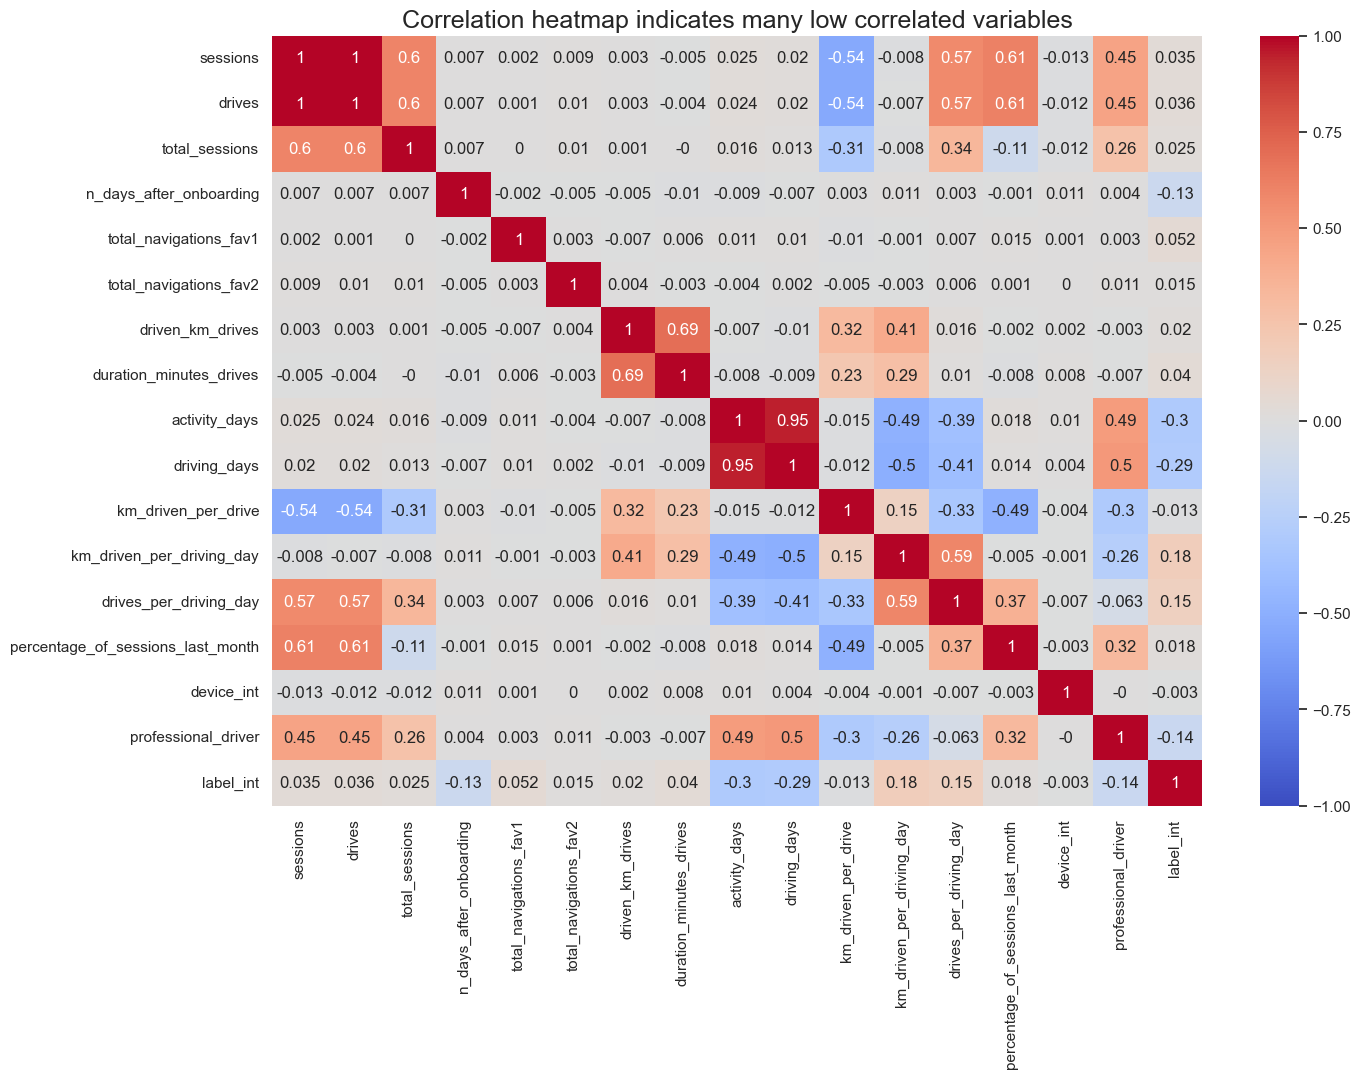

In [561]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(df_waze_2.corr(method='pearson').round(decimals = 3), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm', ax = ax)
ax.set_title("Correlation heatmap indicates many low correlated variables", fontsize = 18)
plt.show()

We consider all predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7** as strpngly multicollinear. If such a pair of columns exists, we will decide to include only one of these variables in our model.

**Note:** 0.7 is an our, arbitrary threshold. Some industries may use 0.6, 0.8, etc.

Now lets answer following question: which variables are multicollinear with each other?

> * *`sessions` and `drives`: 1.0*
<br>
> * *`driving_days` and `activity_days`: 0.95*

#### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label_int` (this is the target)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [562]:
# Isolate predictor variables
X = df_waze_2.drop(columns = ['label_int', 'sessions', 'driving_days'])

# Isolate target variable
y = df_waze_2['label_int']

#### **Split the data**

We will use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables we assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  We want to fit our model on training set and evaluate model on test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), we want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset. We also set `random_state` parameter to certain value to ensure that results are reproducible.

In [563]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [564]:
# Use .head()
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day,percentage_of_sessions_last_month,device_int,professional_driver
152,108,186.192746,3116,243,124,8889.794236,4668.899349,24,85.042481,612.305861,7.200000,0.70,1,1
11899,2,3.487590,794,114,18,3286.545691,1780.902733,5,908.458891,2237.150623,2.000000,0.67,1,0
10937,139,347.106403,331,4,7,7400.838975,2349.305267,15,53.243446,616.736581,11.583333,0.49,2,0
669,108,454.363204,2320,11,4,6566.424830,4558.459870,18,60.800230,410.401552,6.750000,0.27,1,1
8406,10,89.475821,2478,135,0,1271.248661,938.711572,27,127.124866,74.779333,0.588235,0.11,1,0


We use scikit-learn to instantiate a logistic regression model. We will add the argument `penalty = None` since our predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [565]:
model_1 = LogisticRegression(penalty = None, max_iter=400)

model_1.fit(X_train, y_train)

C:\Users\Xer12\myenv_1\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, penalty=None)

In [566]:
pd.Series(model_1.coef_[0], index=X.columns)

drives                               0.003432
total_sessions                       0.000319
n_days_after_onboarding             -0.000411
total_navigations_fav1               0.001241
total_navigations_fav2               0.000916
driven_km_drives                    -0.000038
duration_minutes_drives              0.000109
activity_days                       -0.106202
km_driven_per_drive                  0.000040
km_driven_per_driving_day            0.000208
drives_per_driving_day              -0.012175
percentage_of_sessions_last_month   -0.001134
device_int                          -0.003391
professional_driver                 -0.002851
dtype: float64

In [567]:
model_1.intercept_

array([-0.00228185])

#### **Check final assumption**

Now we will verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

We will call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) |Then, we will assign the result to a variable called `train_probs`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [568]:
# Get the predicted probabilities of the training data
train_probs = model_1.predict_proba(X_train)
train_probs

array([[0.94146511, 0.05853489],
       [0.53773327, 0.46226673],
       [0.76399938, 0.23600062],
       ...,
       [0.92372621, 0.07627379],
       [0.84073673, 0.15926327],
       [0.9319819 , 0.0680181 ]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of training set `X_train`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [569]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in train_probs]

Plot a regplots where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In [570]:
len(X.columns)

14

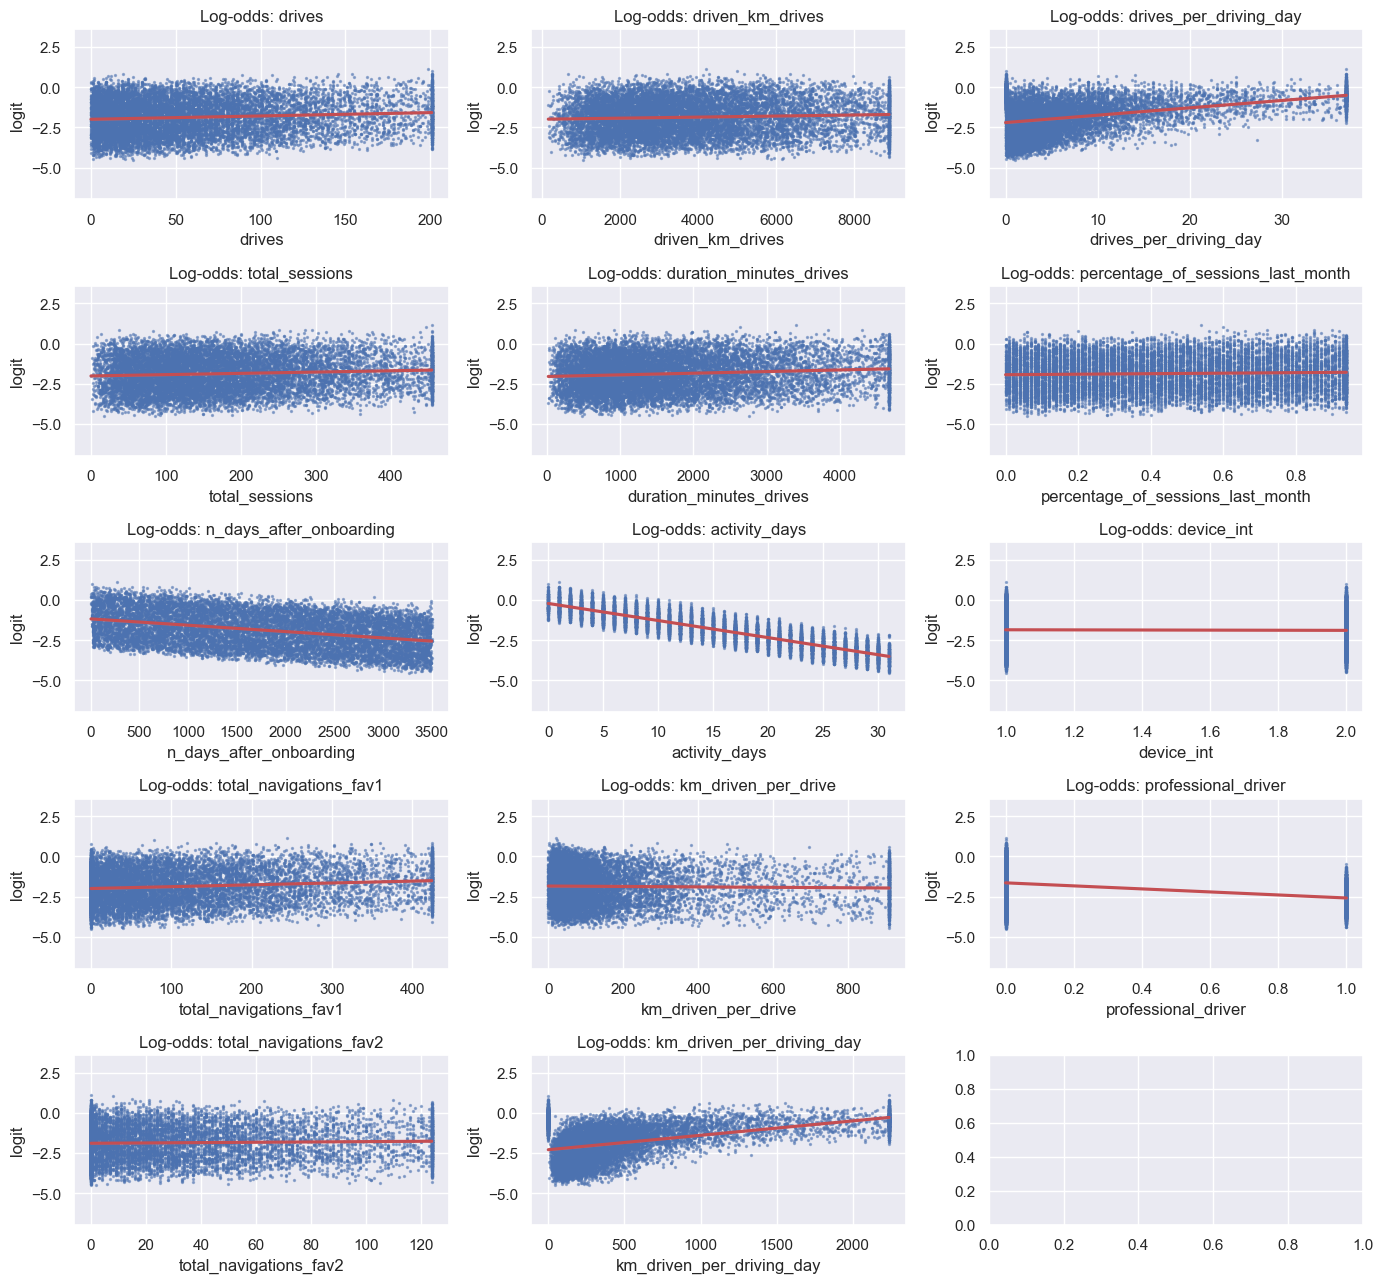

In [571]:
# Plot regplot of `activity_days` log-odds
fig, ax = plt.subplots(5, 3, figsize = (14,13))

for i, c in enumerate(X.columns):
    col_i = i % 5
    row_i = i // 5
    #print("col_i = {}, row_i = {}".format(col_i, row_i))
    sns.regplot(x=c, y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5}, ax = ax[col_i,row_i],line_kws=dict(color="r"))
    ax[col_i,row_i].set_title('Log-odds: {}'.format(c))
    
    current_ylim = ax[col_i,row_i].get_ylim()
    y_range = current_ylim[1] - current_ylim[0]
    new_ylim = (current_ylim[0] - 0.35 * y_range, current_ylim[1] + 0.35 * y_range)

    ax[col_i,row_i].set_ylim(new_ylim)
    
fig.tight_layout()
plt.show();

#### **Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.

Use the code block below to make predictions on the test data.


In [572]:
y_preds = model_1.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.

In [573]:
model_1.score(X_test, y_test)

0.8237762237762237

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [574]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )

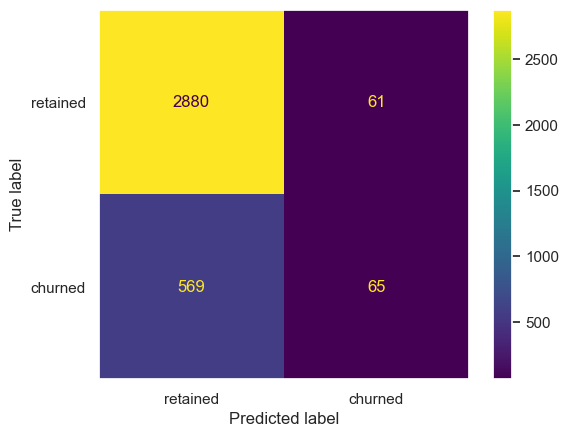

In [575]:
fig, ax = plt.subplots()
disp.plot(ax=ax)
ax.grid(False)

plt.show()

In [576]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.84      0.98      0.90      2941
     churned       0.52      0.10      0.17       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.54      3575
weighted avg       0.78      0.82      0.77      3575



**Note:** The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

Finally, lets generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [577]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model_1.coef_[0]))

# Sort the list by coefficient value, 
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('drives', np.float64(0.003431867570213107)),
 ('total_navigations_fav1', np.float64(0.0012410637138868797)),
 ('total_navigations_fav2', np.float64(0.0009159663208461963)),
 ('total_sessions', np.float64(0.00031856493708820306)),
 ('km_driven_per_driving_day', np.float64(0.00020795386671876678)),
 ('duration_minutes_drives', np.float64(0.00010918097780577093)),
 ('km_driven_per_drive', np.float64(3.952103835792366e-05)),
 ('driven_km_drives', np.float64(-3.795662058240499e-05)),
 ('n_days_after_onboarding', np.float64(-0.00041082254551610975)),
 ('percentage_of_sessions_last_month', np.float64(-0.001134132240757919)),
 ('professional_driver', np.float64(-0.002850922964404023)),
 ('device_int', np.float64(-0.0033908801527519367)),
 ('drives_per_driving_day', np.float64(-0.012175063366624748)),
 ('activity_days', np.float64(-0.10620202039772281))]

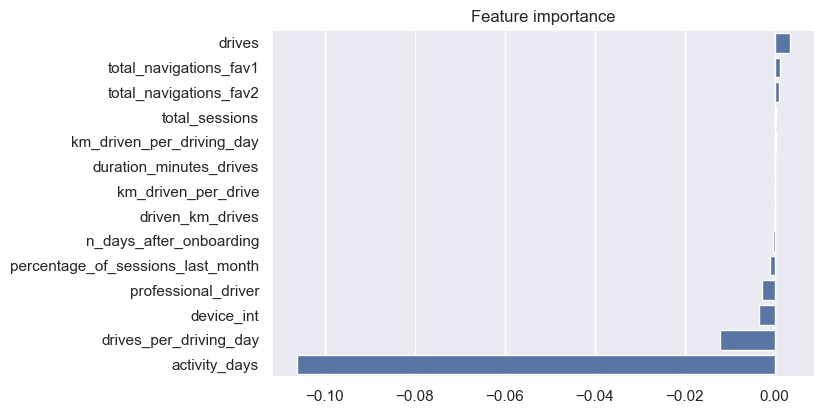

In [578]:
fig, ax = plt.subplots( figsize =(7, 4.5))
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h', ax=ax)
plt.title('Feature importance');

#### We will now answer following, selecting questions. Those answers will help us gain insights about results from building and evaluating our logistic regression model. 


1. What variable most influenced the model's prediction? How? Was this surprising?

> _`activity_days` was by far the most important feature in the model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with `driving_days`, which was known from EDA to have a negative correlation with churn._

2. Were there any variables that you expected to be stronger predictors than they were?

> _Yes. In previous EDA, user churn rate increased as the values in `km_per_driving_day` increased. The correlation heatmap here in this notebook revealed this variable to have the strongest positive correlation with churn of any of the predictor variables by a relatively large margin. In the model, it was the second-least-important variable._

3. Why might a variable you thought to be important not be important in the model?

> _In a multiple logistic regression model, features can interact with each other and these interactions can result in seemingly counterintuitive relationships. This is both a strength and a weakness of predictive models, as capturing these interactions typically makes a model more predictive while at the same time making the model more difficult to explain._

4. Would you recommend that Waze use this model? Why or why not?

> _It depends. What would the model be used for? If it's used to drive consequential business decisions, then no. The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value._

5. What could you do to improve this model?

> _New features could be engineered to try to generate better predictive signal, as they often do if you have domain knowledge. In the case of this model, one of the engineered features (`professional_driver`) was the third-most-predictive predictor. It could also be helpful to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features._

6. What additional features would you like to have to help improve the model?

> _It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs._

## <center>  5. Build a machine learning model   </center>

For this chapter, lets import necessary libraries:

In [579]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

### Even more feature engineering

Lets create new column `average_speed_driven_kmh`, (speed in km/h) dividing `driven_km_drives` by `duration_hours_drives`.

In [580]:
df_waze_2["duration_hours_drives"] = df_waze_2["duration_minutes_drives"] / 60

In [581]:
df_waze_2["average_speed_by_drive_kmh"] = df_waze_2["driven_km_drives"] / df_waze_2["duration_hours_drives"]

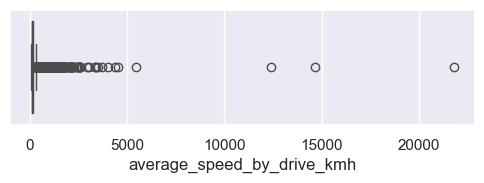

In [582]:
boxplot_sns(df_waze_2, "average_speed_by_drive_kmh", figsize_arg = (6, 1.5))

As we can see above, there is some really strange data. We see some values reaching few thousands km/h, and maximum of almost 22 000 km/h. Obviously, that cannot be true, so we assume that there is some issue with data or there is lack of additional information about `"duration_minutes_drives` or `driven_km_drives` column. For more information about scale of inaccurate data, lets calculate quantiles of average speed column:

In [583]:
df_waze_2["average_speed_by_drive_kmh"].quantile([x * 0.01 for x in range (60,101)])

0.60      141.234655
0.61      143.702738
0.62      145.785760
0.63      148.606069
0.64      151.690253
0.65      154.214624
0.66      156.679776
0.67      160.106741
0.68      163.812680
0.69      167.767385
0.70      170.855938
0.71      174.031647
0.72      178.028781
0.73      181.919651
0.74      186.714177
0.75      191.157779
0.76      196.308525
0.77      201.444392
0.78      206.725387
0.79      212.122154
0.80      218.904988
0.81      226.147567
0.82      233.371784
0.83      242.652367
0.84      251.946473
0.85      262.051735
0.86      272.628170
0.87      284.663238
0.88      297.478528
0.89      312.129652
0.90      329.478160
0.91      349.378838
0.92      373.808138
0.93      399.886052
0.94      434.905804
0.95      478.997285
0.96      533.492207
0.97      626.382040
0.98      785.465722
0.99     1172.984343
1.00    21800.540069
Name: average_speed_by_drive_kmh, dtype: float64

We see that even third quartile is more than 191 km/h, which is very high speed, and probably it is not true. Therefore we abandon the idea of including this column in our model as well as two variables included to calculate this column

In [584]:
df_waze_2.head()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_driven_per_drive,km_driven_per_driving_day,drives_per_driving_day,percentage_of_sessions_last_month,device_int,professional_driver,label_int,duration_hours_drives,average_speed_by_drive_kmh
0,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,11.632058,138.360267,11.894737,0.94,2,1,1,33.096251,79.430298
1,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,128.186173,1246.901868,9.727273,0.41,1,0,1,52.674549,168.768304
2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,32.201567,382.393602,11.875000,0.84,2,0,1,26.845598,113.953460
3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,22.839778,304.530374,13.333333,0.72,1,0,1,9.786609,93.351141
4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,58.091206,219.455667,3.777778,0.50,2,1,1,20.325932,194.342970


#### **`total_sessions_per_day`**

Now, create a new column that represents the mean number of sessions per day _since onboarding_.

In [585]:
df_waze_2['total_sessions_per_day'] = df_waze_2['total_sessions'] / df_waze_2['n_days_after_onboarding']
df_waze_2['total_sessions_per_day'].describe()

count    14299.000000
mean         0.329996
std          1.292124
min          0.000298
25%          0.050818
50%          0.100457
75%          0.208580
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`percent_of_sessions_to_favorite`**

Finally, create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [586]:
df_waze_2['percent_of_drives_to_favorite'] = (
    df_waze_2['total_navigations_fav1'] + df_waze_2['total_navigations_fav2']) / df_waze_2['total_sessions']

df_waze_2['percent_of_drives_to_favorite'].describe()

count    14299.000000
mean         1.576575
std          8.262849
min          0.000000
25%          0.212409
50%          0.648292
75%          1.594046
max        671.949672
Name: percent_of_drives_to_favorite, dtype: float64

### ** Modeling workflow and model selection process**

Our final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. We will split the data into train/validation/test sets (60%/\20%/20%)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.

2. We will fit models and tune hyperparameters on the training set
3. We will select final model based on the results on validation set
4. Assess the champion model's performance on the test set
![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

In [591]:
X = df_waze_2.drop(columns=['label_int'], axis = 1)

y = df_waze_2['label_int']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)